<a href="https://colab.research.google.com/github/prasann25/colab/blob/main/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Introduction Regression with Neural Networks in TensorFlow

There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter ... predicting a number.

In [1]:
# Import TensorFlow
import tensorflow as tf
print (tf.__version__)

2.5.0


##Creating data to view and fit

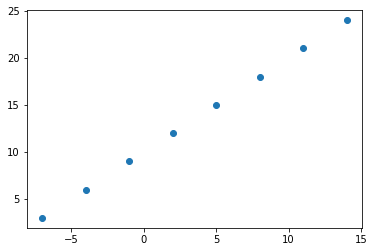

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

#Create labels
y  = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

#Visualize it
plt.scatter(X, y)


In [3]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

##Input and output shapes

In [4]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])

house_price = tf.constant([939700])

house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
X[0], y[0]

(-7.0, 3.0)

In [6]:
X[1], y[1]

(-4.0, 6.0)

In [7]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [8]:
X[0].ndim

0

In [9]:
# Turn our NumPy arrays into tensors

X= tf.cast(tf.constant(X), dtype = tf.float32)
y = tf.cast(tf.constant(y), dtype = tf.float32)

X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

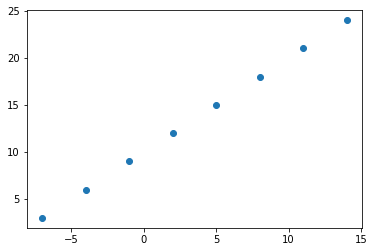

In [10]:
plt.scatter(X, y)

## Steps in modeling with Tensorflow

1. **Creating a model**- define input and output layers , as well as the hidden layers of a deep learning model.
2. **Compiling a model**- define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer(tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X & y (features and labels)

In [11]:
# Set random seed
tf.random.set_seed(42);

# 1. Create a model using the Sequential API

model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae, # mae - mean absoulte error
              optimizer=tf.keras.optimizers.SGD(), # sgd - stochastic gradient descent
              metrics = ["mae"])

#3. Fit the model
model.fit(X, y, epochs=5)



Epoch 1/5
1/1 [==============================] - 3s 3s/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 4ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 7ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 5ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 4ms/step - loss: 10.9748 - mae: 10.9748


In [12]:
#Check out X and y
X, y


(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [13]:
# Try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

array([[12.716021]], dtype=float32)

In [14]:
y_pred + 11

array([[23.71602]], dtype=float32)

##Improving our Model

we can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units( all called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data(give the model more examples to learn from )


In [15]:
#Let's rebuild our model

# 1. Create the model.
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)                               
])

# 2. Compile the model.
model.compile(loss = tf.keras.losses.mae, 
              optimizer= tf.keras.optimizers.SGD(),
              metrics=["mae"])

#3. Fit the model (this time we'll train for longer)
model.fit(X, y, epochs=100)


Epoch 1/100
1/1 [==============================] - 0s 224ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] - 0s 4m

In [16]:
# Remind ourselves of data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [17]:
#Let's see if our model's prediction has improved...
model.predict([17.0])

array([[29.739855]], dtype=float32)

In [18]:
#Let's change one more thing to the above tensor flow  

#1. Create a model (this time with extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([  
   tf.keras.layers.Dense(50, activation=None), 
   tf.keras.layers.Dense(1)  
                           
])

#2. Compile the model
model.compile(loss = tf.keras.losses.mae, 
              #Adjusting the learnig rate, is the best fix for our regression mode.=l
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics = ["mae"]
              )

#3. Fit the model
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 312ms/step - loss: 11.7682 - mae: 11.7682
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 11.0963 - mae: 11.0963
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 10.4149 - mae: 10.4149
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 9.7212 - mae: 9.7212
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 9.0103 - mae: 9.0103
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 8.2778 - mae: 8.2778
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 7.5198 - mae: 7.5198
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 6.9648 - mae: 6.9648
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 7.0672 - mae: 7.0672
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 7.3316 - mae: 7.3316
Epoch 11/100
1/1 [==============================] - 0s 4ms/step - loss:

In [19]:
#Remind of our input data once again
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [20]:
#Let's see if there are further improvements ~closed to 27 , the true out
model.predict([17.0])

#Looks like out model is overfitting and so even loss is less , it wont predict new inputs correctly.

array([[26.583801]], dtype=float32)

## Evaluating the model

In practice, a typical workflow yo'll go through when building neural network is :

```
Build a model -> fit it -> evaluate it-> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it ...
```

When it comes to evaluations.. there are 3 words you should memorize :

> "Visualize, visualize, visualize"

It's a good idea to visualize :
* the data - what data are we working with ? What does it look like?
* the model itself - what does our model look like ?
* the training of a model - how does a model perform while it learns?
* the predictions of the model - how do the predictions of a model line up against the ground truth(the original labels)?


In [21]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [22]:
# Make the labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

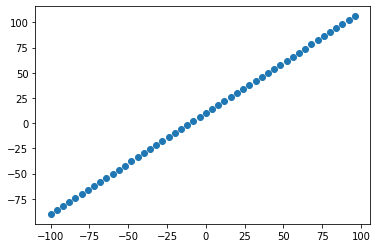

In [23]:
#Visualize the data
import matplotlib.pyplot as plt

plt.scatter(X, y)

### The 3 sets ...

* **Training set** - the model learns from this data, which is typically 70-80% of total data you have available.
* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the data available.
* **Test set** - the model gets evaluated on this data, which is typically 10-15% of the total data available.


In [24]:
# Check the length of how many samples we have
len(X)

50

In [25]:
# Split the data into train and test sets
X_train = X[:40]  # first 40 (80% of total data)
y_train = y[:40]

X_test = X[40:] # last 10 are testing samples(20% of data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)


(40, 10, 40, 10)

### Visualizing the data

Now we've got our data in training and test sets.. let's visualize it again!

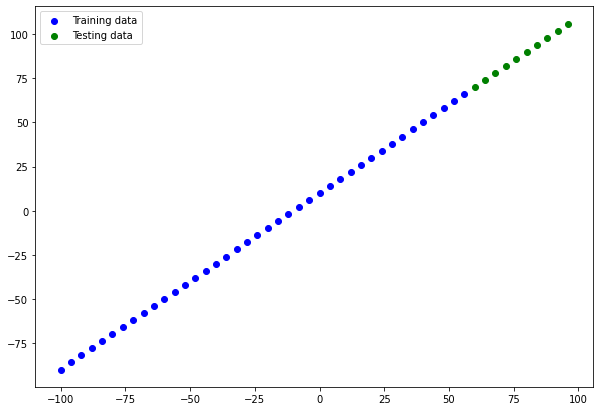

In [26]:
plt.figure(figsize=(10, 7))

#Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")
#Plot test data in green
plt.scatter(X_test, y_test, c="g", label = "Testing data")
#Show a legend
plt.legend()

In [27]:
# Let's have a look at how to build a neural network for our data.

# 1. Create a model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
  ])

#2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

#3. Fit a model
#model.fit(X_train, y_train, epochs=100)



### Visualizing the model

In [28]:
#Uncomment this
#model.summary()

In [29]:
X[0], y[0]

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [30]:
#Let's create a model which builds automatically by defining the input_shape agruments in the first layer.
tf.random.set_seed(42)

#1. Create a model(same as above)
model = tf.keras.Sequential([
     tf.keras.layers.Dense(10, input_shape= [1], name="input_layer"),
     tf.keras.layers.Dense(1, name="output_layer")                  
], name="model_1")

#2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])


In [31]:
#Show the layers it contains, 
#Dense  - fully connected layer
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model.build

* Trainable paramters - these are parameters(patterns) the model can update as it trains.

* Non-trainable parameters - these parameters aren't updated during training (this is typical when you bring in already learn patterns or parameters from other models during **transfer learning**).


**Resources** : For a more in-depth overview of the trainable parameters within a layer, checkout MIT's introduction to deep learning. [https://www.youtube.com/watch?v=5tvmMX8r_OM](https://www.youtube.com/watch?v=5tvmMX8r_OM)

**Exercise** Try playing around with the number of hidden units in the dense layer, see how that effects the number of parameters(total trainable) hy calling `model.summary`.

In [32]:
#Let's fit our model to the training data
model.fit(X_train, y_train, epochs=100, verbose=0)

In [33]:
#Get a summary of our model
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


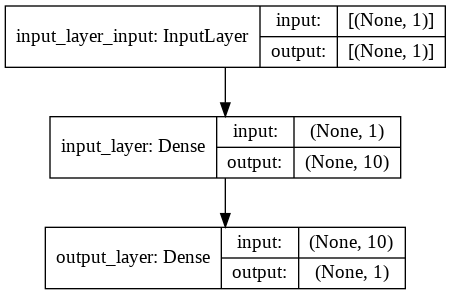

In [34]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

### Visualizing our model's prediction

To visualize predictions, it's a good idea to plot them against the ground truth labels.
Often you'll see this in the form of `y_test' or `y_true'  versus `y_pred` (ground truth versus your model's predictions).

In [35]:
# Make some predictions
y_pred = model.predict(X_test)

y_pred

array([[ 70.55219 ],
       [ 75.139915],
       [ 79.72764 ],
       [ 84.31536 ],
       [ 88.90308 ],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66626 ],
       [107.253975],
       [111.841705]], dtype=float32)

In [36]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

**Note** : If you feel like you're going to reuse some kind of functionality in the future, it's a good idea to turn it into a function.

In [37]:
# Let's create a plotting function

def plot_predictions(train_data = X_train, 
                     train_labels = y_train, 
                     test_data = X_test, 
                     test_labels = y_test,
                     predictions = y_pred
                     ) :
      """
      Plots training data, test data and compare predictions to ground truth labels.
      """
      plt.figure(figsize=(10, 7))
      # Plot training data in blue
      plt.scatter(train_data, train_labels, c="b", label="Training data")
      #Plot testing data in green
      plt.scatter(test_data, test_labels, c="g", label="Testing data")
      #Plot model's predictions
      plt.scatter(test_data, predictions, c="r", label="Preditions")
      # Show the legend
      plt.legend();
                    

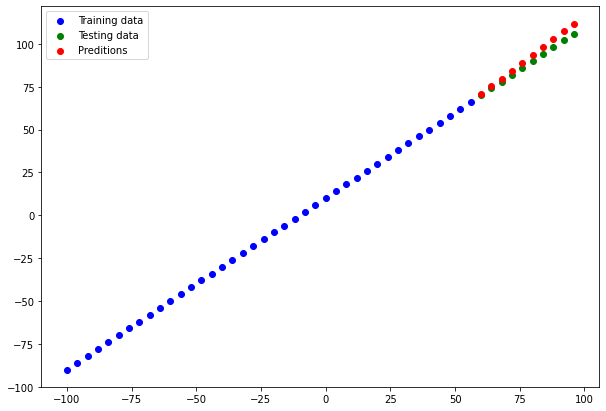

In [38]:
plot_predictions(train_data=X_train, 
                 train_labels = y_train,
                 test_data = X_test, 
                 test_labels = y_test,
                 predictions = y_pred)

### Evaluating our model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression, two of the main metrics :
* MAE - mean absolute error, "on average , how wrong is each of my model's predictions"
* MSE - mean square error, "square the average errors"


In [39]:
# Evaluate the model on the test set

model.evaluate(X_test, y_test)
#Return loss & metrics value  (loss = tf.keras.losses.mae, metrics=["mae"])

1/1 [==============================] - 0s 121ms/step - loss: 3.1969 - mae: 3.1969


[3.196946620941162, 3.196946620941162]

In [40]:
# Calculate the mean absolute error (mae)

mae = tf.metrics.mean_absolute_error(y_true = y_test, 
                                     y_pred = tf.constant(y_pred))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.558247, 14.116051, 11.708944, 10.336927, 10.      , 10.698161,
       12.447118, 15.333008, 19.253975, 23.841705], dtype=float32)>

In [41]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 70.55219 ],
       [ 75.139915],
       [ 79.72764 ],
       [ 84.31536 ],
       [ 88.90308 ],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66626 ],
       [107.253975],
       [111.841705]], dtype=float32)>

In [42]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [43]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.55219 ,  75.139915,  79.72764 ,  84.31536 ,  88.90308 ,
        93.49081 ,  98.07853 , 102.66626 , 107.253975, 111.841705],
      dtype=float32)>

In [44]:
# Calculate mean absolute error

mae = tf.metrics.mean_absolute_error(y_true = y_test, 
                                     y_pred = tf.squeeze(y_pred),
    )
mae

<tf.Tensor: shape=(), dtype=float32, numpy=3.1969466>

In [45]:
# Calculate mean squared error
mse = tf.metrics.mean_squared_error(y_true = y_test,
                                    y_pred = tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=13.070175>

In [46]:
# Make some functions to reuse MAE and MSE

def mae(y_true, y_pred) :
  return tf.metrics.mean_absolute_error(y_true = y_true,
                                 y_pred = tf.squeeze(y_pred))
  
def mse(y_true, y_pred) :
  return tf.metrics.mean_squared_error(y_true = y_true,
                                 y_pred = tf.squeeze(y_pred))

### Running experiments to improve our model

```
Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it...
```
1. **Get more data** - get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels).

2. **Make your model larger** (using a more complex models) - this might come in the form of more layers or more hidden units in each layer.

3. **Train for longer** - give your model more of a chance to find patterns in the data.

Let's do 3 modeling experiments :
1. `model_1` : same as original model, 1 layer, trained for 100 epochs.
2. `model_2` : 2 layers, trained for 100 epochs
3. `model_3` : 2 layers, trained for 500 epochs

**Build `model_1`**


In [47]:
# Experiment 1

#Set random_seed
tf.random.set_seed(42)

#1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model_1.compile(loss=tf.keras.losses.mae, 
                optimizer = tf.keras.optimizers.SGD(),
                metrics=["mae"])

#3. Fit the model
model_1.fit(X_train, y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 0s 12ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 3ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 11.1074 - mae: 11.1074
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 9.2990 - mae: 9.2990
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 4ms/step - 

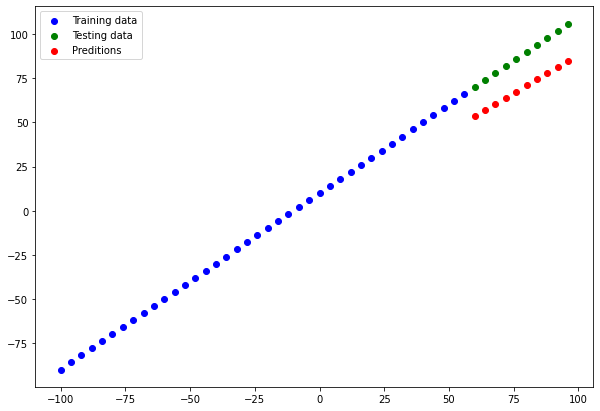

In [48]:
# Make and plot predictions for model_1

y_preds_1 = model_1.predict(X_test)
y_preds_1

plot_predictions(predictions=y_preds_1)

In [49]:
tf.constant(y_preds_1), tf.squeeze(y_preds_1)

(<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
 array([[53.57109 ],
        [57.05633 ],
        [60.541573],
        [64.02681 ],
        [67.512054],
        [70.99729 ],
        [74.48254 ],
        [77.96777 ],
        [81.45301 ],
        [84.938255]], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([53.57109 , 57.05633 , 60.541573, 64.02681 , 67.512054, 70.99729 ,
        74.48254 , 77.96777 , 81.45301 , 84.938255], dtype=float32)>)

In [50]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [51]:
#Calculate model_1 evaluation metrics

mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>,
 <tf.Tensor: shape=(), dtype=float32, numpy=353.5734>)

**Build `model_2`**
* 2 dense layers, trained for 100 epochs

In [52]:
# Build model_2
tf.random.set_seed(42)

#1. Create the model 
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)                       
])

#2. Compile the model
model_2.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics=["mse"])

#Fit the model
model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 7ms/step - loss: 27.4058 - mse: 1084.1481
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 24.6339 - mse: 777.9203
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 29.8935 - mse: 1334.8955
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 27.4055 - mse: 1106.8035
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 14.9463 - mse: 281.1077
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 11.8819 - mse: 168.6621
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 11.1988 - mse: 151.3508
Epoch 8/100
2/2 [==============================] - 0s 3ms/step - loss: 11.0910 - mse: 160.3745
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 40.4763 - mse: 2586.0081
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 27.8687 - mse: 1094.4379
Epoch 11/100
2/2 [==========================

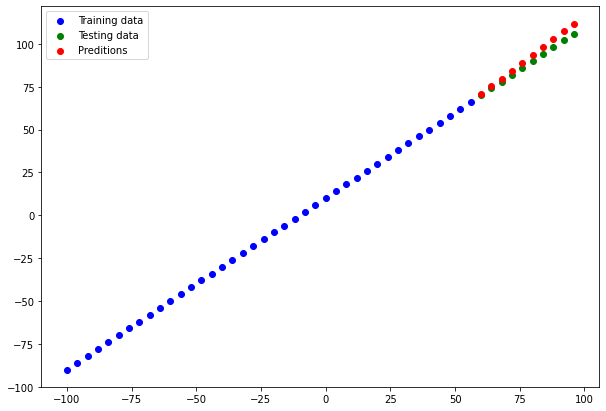

In [53]:
# Make predictions and plot  for model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

#model_2.evaluate(X_test, y_test)

In [54]:
#Calculate model_1 evaluation metrics
mae_2 = mae(y_test, y_pred=y_preds_2)
mse_2 = mse(y_test, y_pred=y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.1969466>,
 <tf.Tensor: shape=(), dtype=float32, numpy=13.070175>)

**Build `model_3`**

* 2 layers trained for 500 epochs

In [55]:
#Buidl model_3
tf.random.set_seed(42)

#1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])
#3. Fit the model
model_3.fit(X_train, y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 7ms/step - loss: 27.4058 - mae: 27.4058
Epoch 2/500
2/2 [==============================] - 0s 3ms/step - loss: 24.6339 - mae: 24.6339
Epoch 3/500
2/2 [==============================] - 0s 3ms/step - loss: 29.8935 - mae: 29.8935
Epoch 4/500
2/2 [==============================] - 0s 3ms/step - loss: 27.4055 - mae: 27.4055
Epoch 5/500
2/2 [==============================] - 0s 4ms/step - loss: 14.9463 - mae: 14.9463
Epoch 6/500
2/2 [==============================] - 0s 5ms/step - loss: 11.8819 - mae: 11.8819
Epoch 7/500
2/2 [==============================] - 0s 4ms/step - loss: 11.1988 - mae: 11.1988
Epoch 8/500
2/2 [==============================] - 0s 6ms/step - loss: 11.0910 - mae: 11.0910
Epoch 9/500
2/2 [==============================] - 0s 5ms/step - loss: 40.4763 - mae: 40.4763
Epoch 10/500
2/2 [==============================] - 0s 4ms/step - loss: 27.8687 - mae: 27.8687
Epoch 11/500
2/2 [==============================] - 0s 4ms/

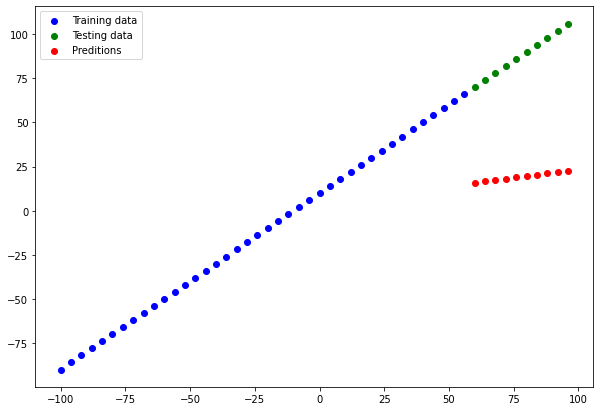

In [56]:
# Make predictions and plot
y_preds_3 = model_3.predict(X_test)

plot_predictions(predictions=y_preds_3)

In [57]:
#Calculate model_1 evaluation metrics

mae_3 = mae(y_test, y_pred=y_preds_3)
mse_3 = mse(y_test, y_pred=y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.71362>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4808.0283>)

***Note***: You want to start with small experiments(models) and make sure they work and then increase their scale when necessary.*italicized text*

### Comparing the results of our experiments

We've run a few experiments, let's compare the results.

In [58]:
# Let's compare our model's result using a pandas DataFrame
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                  ["model_2", mae_2.numpy(), mse_2.numpy()],
                  ["model_3", mae_3.numpy(), mse_3.numpy()]]
all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results


,model,mae,mse
0,model_1,18.745327,353.573395
1,model_2,3.196947,13.070175
2,model_3,68.713623,4808.028320


Looks like **`model_2`** performed the best...

In [59]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


> ***Note*** : One of your main goals should be to minimize the time between your experiments. The more experiments you do, the more things you'll figure out which don't work and in turn, get closer to figuring out the what does work. Rememeber the machine learnng practioner's motto : "experiment, experiment, experiment".

## Tracking your experiments

One really good habit in machine learning modelling is to track the results of your experiments.

And when doing so, it can be tedious if you're running lots of experiments.

Luckily, there are tools to help us!

**Resource** : As you build more models, you'll want to look into using :

* **TensorBoard**  - a component of the TensorFlow library to help track modelling experiments( we'll see this one later).

* **Weights & Biases** - a tool for all kinds of machine learning experiments(plugs right onto TensorBoard)

## Saving our models

Saving our models allows us to use them outside of Google colab (or wherever they were trained) such as in a web app or mobile app.

**Note** : There are 2 main formats we can save model's too:
1. The SavedModel format
2. The HDF5 format

In [60]:
#Save model to savedmodel format, save it as .pb file
# If you want to use it for pure within Tensorflow, use this, otherwise HDF5
model_2.save("best_model_SavedModel_format")

INFO:tensorflow:Assets written to: best_model_SavedModel_format/assets


In [61]:
#Save model to HDF5 format
model_2.save('best_model_hdf5_format.h5')

In [62]:
### A larger example


In [63]:
#Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [65]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
# Writing tensorflow code to learn the relationship between related attributes

#Regression Analysis


In [67]:
insurance["smoker"], insurance["age"]

(0       yes
 1        no
 2        no
 3        no
 4        no
        ... 
 1333     no
 1334     no
 1335     no
 1336     no
 1337    yes
 Name: smoker, Length: 1338, dtype: object, 0       19
 1       18
 2       28
 3       33
 4       32
         ..
 1333    50
 1334    18
 1335    18
 1336    21
 1337    61
 Name: age, Length: 1338, dtype: int64)

In [69]:
# Let's try one-hot encode our insurance its all numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
